# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7]) 

### [標準分數 Z-score](https://zh.wikipedia.org/wiki/%E6%A8%99%E6%BA%96%E5%88%86%E6%95%B8#targetText%3D%E6%A8%99%E6%BA%96%E5%88%86%E6%95%B8%EF%BC%88Standard+Score%EF%BC%8C%E5%8F%88%2C%E5%85%AD%E4%B9%8B%E9%96%93%E4%B8%8D%E7%AD%89%E3%80%82)

標準分數（Standard Score，又稱z-score，中文稱為Z-分數或標準化值）在統計學中是一種無因次值，就是一種純數字標記，是藉由從單一（原始）分數中減去母體的平均值，再依照母體（母集合）的標準差分割成不同的差距，按照z值公式，各個樣本在經過轉換後，通常在正、負五到六之間不等。

sum(x-x.mean()/x.std())

In [60]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [51]:
# 設定 data_path
dir_data = './data/'

In [52]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

### [pd.cut](https://medium.com/@morris_tai/pandas的cut-qcut函數-93c244e34cfc)

In [53]:
#1
"""
Your code here
"""
cut_rule = [0, 0.9, 2, 5, 100]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP']

0         (-0.001, 0.9]
1         (-0.001, 0.9]
2         (-0.001, 0.9]
3         (-0.001, 0.9]
4         (-0.001, 0.9]
              ...      
307506    (-0.001, 0.9]
307507    (-0.001, 0.9]
307508    (-0.001, 0.9]
307509    (-0.001, 0.9]
307510    (-0.001, 0.9]
Name: CNT_CHILDREN_GROUP, Length: 307511, dtype: category
Categories (4, interval[float64]): [(-0.001, 0.9] < (0.9, 2.0] < (2.0, 5.0] < (5.0, 100.0]]

In [54]:
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-0.001, 0.9]    215371
(0.9, 2.0]        87868
(2.0, 5.0]         4230
(5.0, 100.0]         42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [55]:
#2-1 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
"""
Your code here
"""
grp = ["CNT_CHILDREN_GROUP", "TARGET"]

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
(-0.001, 0.9]       0         166747.010980
                    1         160804.210548
(0.9, 2.0]          0         174590.584401
                    1         176115.362720
(2.0, 5.0]          0         175053.742913
                    1         160677.385714
(5.0, 100.0]        0         139159.090909
                    1         180000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

## [pandas.DataFrame.boxplot](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.boxplot.html)
本身就有groupby的功能，只要丟想要groupby的資料就可以了

箱形圖會列出資料上下界，中間的線代表資料的分佈狀態，就是平均值

In [56]:
try_df = pd.DataFrame(np.random.randn(10,3),
                      columns=['Col1', 'Col2', 'Col3'])
try_df['X'] = pd.Series(['A', 'A', 'A', 'A', 'A',
                     'B', 'B', 'B', 'B', 'B'])
try_df['Y'] = pd.Series(['A', 'B', 'A', 'B', 'A',
                     'B', 'A', 'B', 'A', 'B'])
try_df

,Col1,Col2,Col3,X,Y
0,-0.567886,-1.392630,0.994537,A,A
1,1.105736,-0.198716,0.049409,A,B
2,-1.644914,-0.949015,-0.985286,A,A
3,1.634694,0.335781,-0.961247,A,B
4,0.188981,-0.081358,1.516232,A,A
5,-1.461175,-1.209072,-1.762334,B,B
6,0.202866,-1.207545,0.553580,B,A
7,-2.451532,-1.761588,-0.426440,B,B
8,0.149457,-1.160816,1.334107,B,A
9,-0.308226,1.323362,-1.008962,B,B


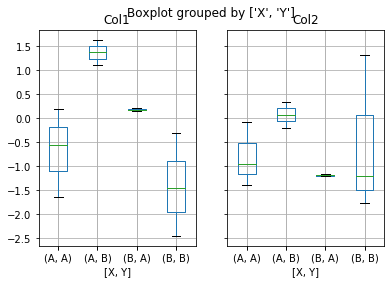

In [57]:
try_df.boxplot(column=['Col1', 'Col2'], by=['X', 'Y'])
plt.show()

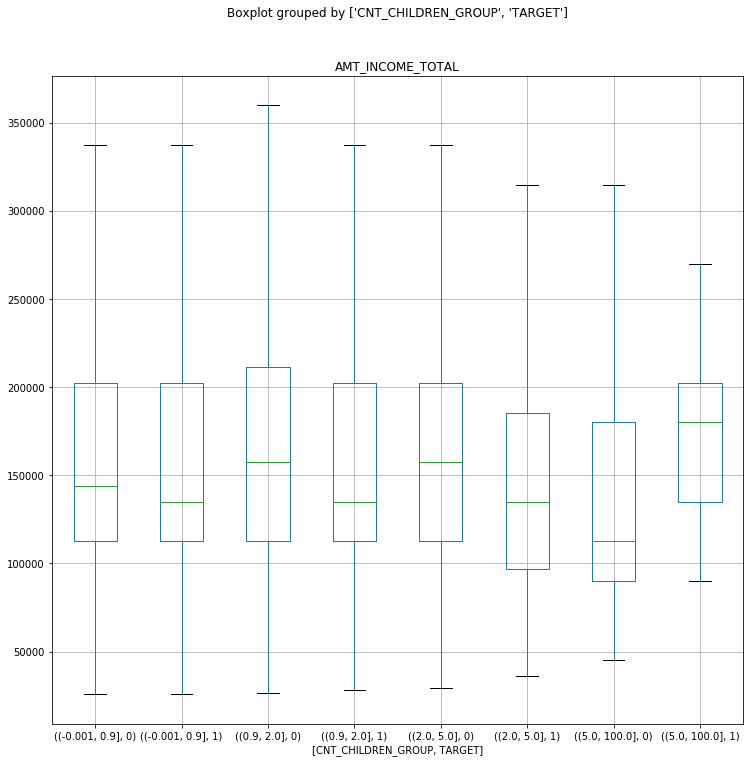

In [58]:
#2-2
"""
Your code here
"""
plt_column = "AMT_INCOME_TOTAL"
plt_by = ["CNT_CHILDREN_GROUP", "TARGET"]

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
# plt.suptitle('')
plt.show()

### lambda x: x / x.mean()

In [65]:
#3 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x-x.mean()/x.std()))

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,202498.104397
1,270000.0,269998.429580
2,67500.0,67498.429580
3,135000.0,134998.429580
4,121500.0,121498.429580
